# Coronavirus Simulation

## Initialization

Import the required libraries.

In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the coronavirus state object

In [30]:
coronavirus = State(dead=0, recovered=0, infected=1, not_infected=0, total=0)

,values
dead,0
recovered,0
infected,1
not_infected,0
total,0


Initialize the TimeSeries objects

In [31]:
not_infected = TimeSeries()
infected = TimeSeries()
dead = TimeSeries()
recovered = TimeSeries()

,values


## Declaration

Declare the infect function.

In [14]:
def infect(p):
    if coronavirus.total > 0:
        if flip(p):
            coronavirus.infected += 1
            coronavirus.not_infected -= 1
        coronavirus.total -= 1

Declare the infect_step function.

In [15]:
def infected_step():
    if flip(0.036):
        coronavirus.dead += 1
        coronavirus.infected -= 1
    else:
        if flip(0.5):
            coronavirus.recovered += 1
            coronavirus.not_infected += 1
            coronavirus.infected -= 1

Declare the day_pass function.

In [20]:
def day_pass(x, p, day):
    for i in range(x):
        infect(p)
    if (day >= 18):
        if coronavirus.infected > 1:
            rangeNumber = int(coronavirus.infected * random.random())
            for i in range(rangeNumber):
                infected_step()

Declare the draw function.

In [17]:
def draw():
    fig = plt.figure(figsize=(30,10))
    
    plt.subplot2grid((2,3),(0,0))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper right')
    plt.plot(infected, color='orange')
    plt.plot(not_infected, color='blue')
    plt.plot(dead, color='red')
    plt.plot(recovered, color='green')
    plt.title('Coronavirus status per day')
    plt.xlabel('Time step (day)') 
    plt.ylabel('Number of persons')
    savefig('figs/chap02-fig01.pdf')
    
    
    plt.subplot2grid((2,3),(0,1))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper center')
    plt.scatter(infected, dead, color='orange')
    plt.scatter(not_infected, recovered, color='blue')
    plt.scatter(dead, recovered, color='red')
    plt.scatter(recovered, infected, color='green')
    plt.title('Population Data Dispersion')
    plt.xlabel('Persons')
    plt.ylabel('Persons')
    savefig('figs/chap02-fig02.pdf')

Declare the run simulation function.

In [23]:
def run_simulation(population, infect_prob, relations_per_day):
    coronavirus.total = population
    infectable_persons = relations_per_day
    coronavirus.not_infected = population
    
    pStandardDev = statistics.pstdev([population, infect_prob, relations_per_day])
    imprime = 'Desviación: ' + repr(pStandardDev)
    print(imprime)

    day = 1
    while True:
        day_pass(infectable_persons, infect_prob, day)
        infected[day] = coronavirus.infected
        dead[day] = coronavirus.dead
        recovered[day] = coronavirus.recovered
        not_infected[day] = coronavirus.not_infected
        
        day += 1
        print('day: ' + str(day))
        print('infected: ' + str(coronavirus.infected))
        print('dead: ' + str(coronavirus.dead))
        
        infectable_persons = relations_per_day * coronavirus.infected
        if (coronavirus.infected <= 1):
            break
    draw()

# Run simulation

Run simulation with run_simulation(population, prob, relations). Parameters:
- Population: Quantity of people that can be reached
- Prob: probability of infection
- Relations: Quantity of people that a person meets per day

Desviación: 4711.530624274051
day: 2
infected: 9
dead: 0
day: 3
infected: 72
dead: 0
day: 4
infected: 551
dead: 0
day: 5
infected: 4269
dead: 0
day: 6
infected: 6768
dead: 0
day: 7
infected: 6768
dead: 0
day: 8
infected: 6768
dead: 0
day: 9
infected: 6768
dead: 0
day: 10
infected: 6768
dead: 0
day: 11
infected: 6768
dead: 0
day: 12
infected: 6768
dead: 0
day: 13
infected: 6768
dead: 0
day: 14
infected: 6768
dead: 0
day: 15
infected: 6768
dead: 0
day: 16
infected: 6768
dead: 0
day: 17
infected: 6768
dead: 0
day: 18
infected: 6768
dead: 0
day: 19
infected: 3592
dead: 187
day: 20
infected: 1914
dead: 300
day: 21
infected: 1786
dead: 310
day: 22
infected: 1455
dead: 333
day: 23
infected: 930
dead: 372
day: 24
infected: 879
dead: 375
day: 25
infected: 855
dead: 375
day: 26
infected: 627
dead: 395
day: 27
infected: 362
dead: 412
day: 28
infected: 298
dead: 423
day: 29
infected: 235
dead: 424
day: 30
infected: 128
dead: 428
day: 31
infected: 83
dead: 430
day: 32
infected: 72
dead: 430
day: 33

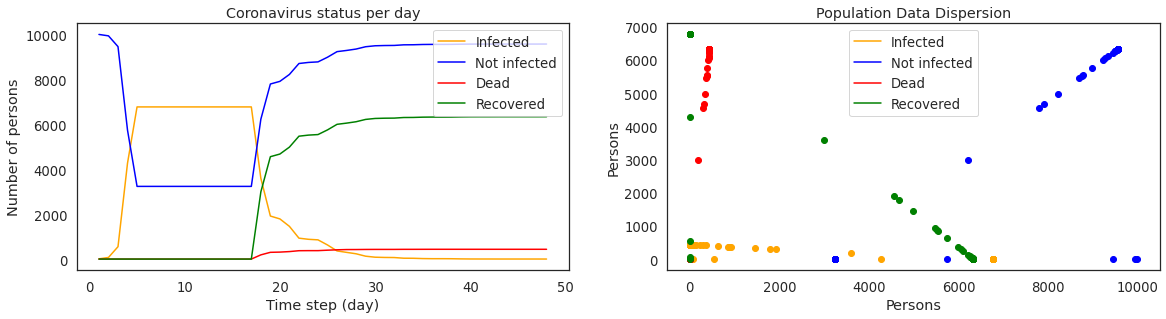

In [32]:
run_simulation(10000, 0.675, 10)